In [ ]:
!pip install ultralytics &> /dev/null

In [ ]:
from ultralytics import YOLO
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from IPython.display import HTML, Video, Image, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
img_path='/content/drive/MyDrive/archive/images'

In [ ]:
destination = "frame"
if not os.path.exists(destination):
    os.makedirs(destination)

files=os.listdir(img_path)

for filename in files[0:2]:
    src_path = os.path.join(img_path, filename)
    if filename.endswith(".jpg"):
        dst_path = os.path.join(destination, filename)
        shutil.copyfile(src_path, dst_path)

!ls frame

100.jpg  1.jpg


In [ ]:
path_frame='./frame'
path_fig='./fig'

In [ ]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:03<00:00, 38.1MB/s]


In [ ]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.7 source={path_frame} save=True

Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

image 1/2 /content/frame/1.jpg: 384x640 18 persons, 2232.9ms
image 2/2 /content/frame/100.jpg: 384x640 14 persons, 2024.6ms
Speed: 2.9ms preprocess, 2128.7ms inference, 24.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
path_run='./runs/detect/predict'

In [ ]:
def create_animation(ims):
    fig=plt.figure(figsize=(12,8))
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    text = plt.text(0.05, 0.05, f'Slide {0}', transform=fig.transFigure, fontsize=14, color='blue')
    plt.axis('off')
    plt.close()

    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        text.set_text(f'Slide {i}')
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

create_animation(np.array(images0))

In [ ]:
results = model.predict(path_frame,conf=0.7)
print(len(results))


image 1/2 /content/frame/1.jpg: 384x640 18 persons, 1997.8ms
image 2/2 /content/frame/100.jpg: 384x640 14 persons, 1957.4ms
Speed: 2.6ms preprocess, 1977.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
2


In [ ]:
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    # Access the 'data' attribute of the Boxes object
    arri=pd.DataFrame(results[i].boxes.data).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

<ipython-input-43-b86f3a95e12a>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  BOX=pd.concat([BOX,arri],axis=0)


,x,y,x2,y2,confidence,class,i
0,0.468521,852.945618,64.245949,1021.611938,0.888410,0.0,0.0
1,1858.710938,622.476807,1909.246582,752.508911,0.877474,0.0,0.0
2,680.457275,475.767548,716.533264,592.936096,0.874302,0.0,0.0
3,796.065674,324.529327,850.902832,421.281738,0.863099,0.0,0.0
4,475.703522,335.656128,520.732178,435.462799,0.860803,0.0,0.0
5,401.195709,545.173645,440.689545,682.377686,0.848097,0.0,0.0
6,1337.990479,581.395874,1393.186646,711.242798,0.846887,0.0,0.0
7,1689.511597,493.577911,1732.965088,622.464172,0.840259,0.0,0.0
8,1456.214111,523.445679,1519.042358,616.521606,0.829379,0.0,0.0
9,1035.467773,549.185364,1080.962036,672.218323,0.829316,0.0,0.0


In [ ]:
class_map = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}

In [ ]:
BOX['class']=BOX['class'].apply(lambda x: class_map[int(x)+1])
BOX=BOX.reset_index(drop=True)
display(BOX)
display(BOX['class'].value_counts())

,x,y,x2,y2,confidence,class,i
0,0.468521,852.945618,64.245949,1021.611938,0.888410,person,0.0
1,1858.710938,622.476807,1909.246582,752.508911,0.877474,person,0.0
2,680.457275,475.767548,716.533264,592.936096,0.874302,person,0.0
3,796.065674,324.529327,850.902832,421.281738,0.863099,person,0.0
4,475.703522,335.656128,520.732178,435.462799,0.860803,person,0.0
5,401.195709,545.173645,440.689545,682.377686,0.848097,person,0.0
6,1337.990479,581.395874,1393.186646,711.242798,0.846887,person,0.0
7,1689.511597,493.577911,1732.965088,622.464172,0.840259,person,0.0
8,1456.214111,523.445679,1519.042358,616.521606,0.829379,person,0.0
9,1035.467773,549.185364,1080.962036,672.218323,0.829316,person,0.0


,count
class,
person,32


In [ ]:
data0 = BOX.query("`class` == 'person' and `confidence` > 0.7")
data0['i']=data0['i'].apply(lambda x: int(x))
data0['path']=data0['i'].apply(lambda x:os.path.join('./frame',files[x]))
data0=data0.reset_index(drop=True)
data0['j']=data0.index.tolist()
display(data0)

,x,y,x2,y2,confidence,class,i,path,j
0,0.468521,852.945618,64.245949,1021.611938,0.888410,person,0,./frame/100.jpg,0
1,1858.710938,622.476807,1909.246582,752.508911,0.877474,person,0,./frame/100.jpg,1
2,680.457275,475.767548,716.533264,592.936096,0.874302,person,0,./frame/100.jpg,2
3,796.065674,324.529327,850.902832,421.281738,0.863099,person,0,./frame/100.jpg,3
4,475.703522,335.656128,520.732178,435.462799,0.860803,person,0,./frame/100.jpg,4
5,401.195709,545.173645,440.689545,682.377686,0.848097,person,0,./frame/100.jpg,5
6,1337.990479,581.395874,1393.186646,711.242798,0.846887,person,0,./frame/100.jpg,6
7,1689.511597,493.577911,1732.965088,622.464172,0.840259,person,0,./frame/100.jpg,7
8,1456.214111,523.445679,1519.042358,616.521606,0.829379,person,0,./frame/100.jpg,8
9,1035.467773,549.185364,1080.962036,672.218323,0.829316,person,0,./frame/100.jpg,9


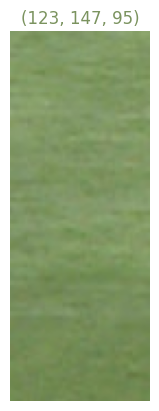

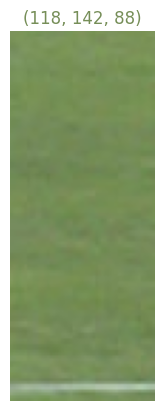

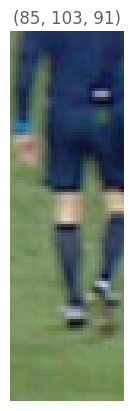

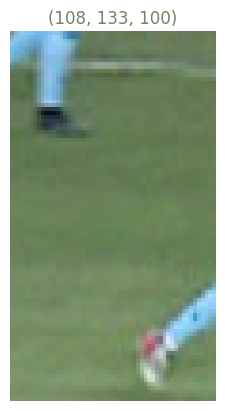

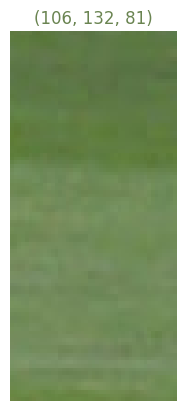

In [ ]:
for i in range(5):#len(data0)
    path=data0.iloc[i,7]
    x=int(data0.iloc[i,0])
    y=int(data0.iloc[i,1])
    x2=int(data0.iloc[i,2])
    y2=int(data0.iloc[i,3])
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    w,h=img.shape[0],img.shape[1]
    #img=cv2.rectangle(img,(x,y),(x2,y2),(0,255,0),2)
    img2=img[y:y2,x:x2,:]
    color=tuple(np.mean(img2,axis=(0,1)).astype(int))
    data0.loc[i,'color']=str(color)
    plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

#display(data0)

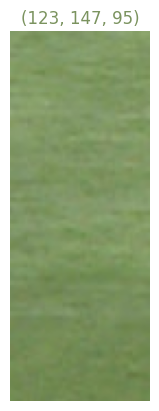

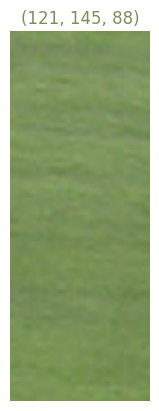

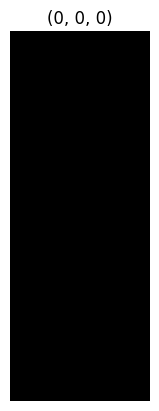

In [ ]:
i=0
path=data0.iloc[i,7]
x=int(data0.iloc[i,0])
y=int(data0.iloc[i,1])
x2=int(data0.iloc[i,2])
y2=int(data0.iloc[i,3])
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
w,h=img.shape[0],img.shape[1]

#original player image
img2=img[y:y2,x:x2,:]
color=tuple(np.mean(img2,axis=(0,1)).astype(int))
data0.loc[i,'color']=str(color)
plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
plt.imshow(img2)
plt.axis('off')
plt.show()

#standard grass image
path=data0.iloc[i,7]
bgimg=img[y-100:y2-100,x-100:x2-100,:]
color=tuple(np.mean(bgimg,axis=(0,1)).astype(int)) #color of grass
plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
plt.imshow(bgimg)
plt.axis('off')
plt.show()

#create grass-masked image
bgimg2=cv2.resize(bgimg,dsize=(img2.shape[1],img2.shape[0]))
diff = cv2.absdiff(img2, bgimg2)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
mask = cv2.merge((thresh, thresh, thresh))
masked_image = cv2.bitwise_and(img2, mask)
color=tuple(np.mean(masked_image,axis=(0,1)).astype(int))
plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
plt.imshow(masked_image)
plt.axis('off')
plt.show()

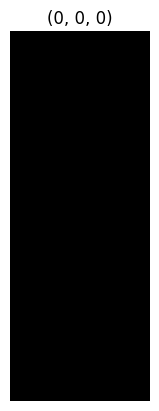

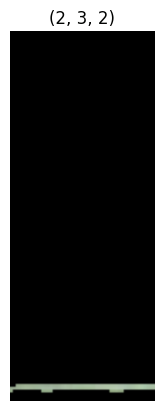

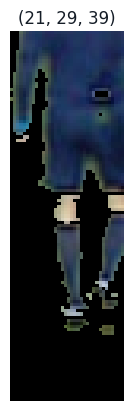

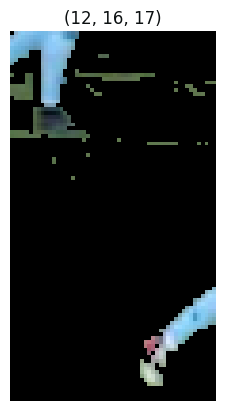

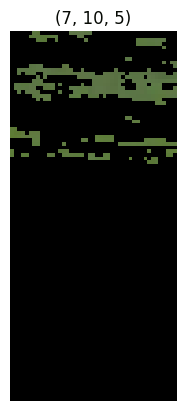

In [ ]:
for i in range(5):#len(data0)
    path=data0.iloc[i,7]
    x=int(data0.iloc[i,0])
    y=int(data0.iloc[i,1])
    x2=int(data0.iloc[i,2])
    y2=int(data0.iloc[i,3])
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    w,h=img.shape[0],img.shape[1]

    img2=img[y:y2,x:x2,:]
    bgimg2=cv2.resize(bgimg,dsize=(img2.shape[1],img2.shape[0]))#resize bgimg to size of img2

    diff = cv2.absdiff(img2, bgimg2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    mask = cv2.merge((thresh, thresh, thresh))
    masked_image = cv2.bitwise_and(img2, mask)
    color=tuple(np.mean(masked_image,axis=(0,1)).astype(int))
    plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
    plt.imshow(masked_image)
    plt.axis('off')
    plt.show()